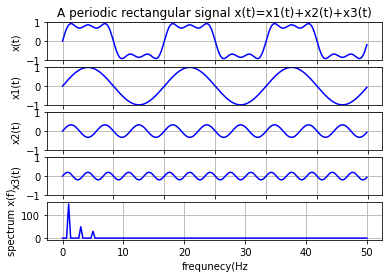

In [13]:
#ex01
import numpy as np
import matplotlib.pyplot as plt

fs=100; dt=1/fs; N=300
#샘플링 주파수 100hz, 0.01초 간격(dt)으로 300개 샘플
t=np.arange(0, N)*dt
#시간축은 0.01초 * 300샘플=3초

x1t=1.0*np.sin(2*np.pi*1*t) # Amplitude 1, 주파수 1hz 정형파 신호 -> x1(t)=A*sin(2*pi*f*t) 연속시간 주기함수
x2t=1/3*np.sin(2*np.pi*3*t) # Amplitude 1/3, 주파수 3hz 정형파 신호
x3t=1/5*np.sin(2*np.pi*5*t) # Amplitude 1/5, 주파수 5hz 정형파 신호
xt=x1t+x2t+x3t # 세 신호 합성

df=fs/N # 주파수 간격
f=np.arange(0,N)*df # 주파수축 0~50hz (0~fs/2)
xf=np.fft.fft(xt) # 주파수별 크기 계산(FFT)

plt.subplot(5,1,1); plt.plot(t, xt, "b"); plt.ylim(-1,1); plt.grid()
plt.ylabel("x(t)")

plt.title("A periodic rectangular signal x(t)=x1(t)+x2(t)+x3(t)")

plt.subplot(5,1,2); plt.plot(t, x1t, "b"); plt.ylim(-1,1); plt.grid()
plt.ylabel("x1(t)")

plt.subplot(5,1,3); plt.plot(t, x2t, "b"); plt.ylim(-1,1); plt.grid()
plt.ylabel("x2(t)")

plt.subplot(5,1,4); plt.plot(t, x3t, "b"); plt.ylim(-1,1); plt.grid()
plt.ylabel("x3(t)")

plt.subplot(5,1,5); plt.plot(f[0:int(N/2+1)], np.abs(xf[0:int(N/2+1)]), "b");
plt.xlabel("frequnecy(Hz"); plt.ylabel("spectrum x(f)"); plt.grid()

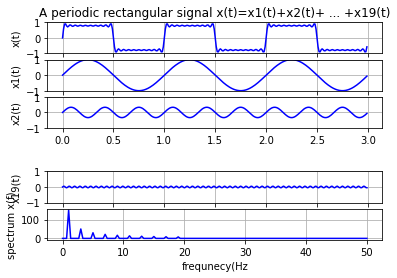

In [4]:
#ex02
import numpy as np
import matplotlib.pyplot as plt

fs=100; dt=1/fs; N=300
#샘플링 주파수 100hz, 0.01초 간격(dt)으로 300개 샘플
t=np.arange(0, N)*dt
#시간축은 0.01초 * 300샘플=3초

x1t=1.0*np.sin(2*np.pi*1*t) # Amplitude 1, 주파수 1hz 정형파 신호 -> x1(t)=A*sin(2*pi*f*t) 연속시간 주기함수
x2t=1/3*np.sin(2*np.pi*3*t) # Amplitude 1/3, 주파수 3hz 정형파 신호
x19t=1/19*np.sin(2*np.pi*19*t) # Amplitude 1/5, 주파수 19hz 정형파 신호
sum=0

for i in range(1,20,2): # 19개 신호의 합성
    sum=sum+1/i*np.sin(2*np.pi*i*t)
    
xt=sum # 신호 합성

df=fs/N # 주파수 간격
f=np.arange(0,N)*df # 주파수축 0~50hz (0~fs/2)
xf=np.fft.fft(xt) # 주파수별 크기 계산(FFT)

plt.subplot(6,1,1); plt.plot(t, xt, "b"); plt.ylim(-1,1); plt.grid()
plt.ylabel("x(t)")

plt.title("A periodic rectangular signal x(t)=x1(t)+x2(t)+ ... +x19(t)")

plt.subplot(6,1,2); plt.plot(t, x1t, "b"); plt.ylim(-1,1); plt.grid()
plt.ylabel("x1(t)")

plt.subplot(6,1,3); plt.plot(t, x2t, "b"); plt.ylim(-1,1); plt.grid()
plt.ylabel("x2(t)")

plt.subplot(6,1,5); plt.plot(t, x19t, "b"); plt.ylim(-1,1); plt.grid()
plt.ylabel("x19(t)")

plt.subplot(6,1,6); plt.plot(f[0:int(N/2+1)], np.abs(xf[0:int(N/2+1)]), "b");
plt.xlabel("frequnecy(Hz"); plt.ylabel("spectrum x(f)"); plt.grid()

Text(0.5, 1.0, 'CTFT, of a non-periodic signal')

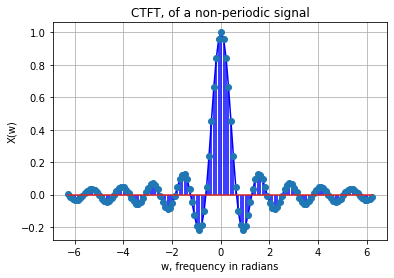

In [13]:
#ex06
import numpy as np
import matplotlib.pyplot as plt

w=np.arange(-2*np.pi, 2*np.pi, 0.1) #주파수 축 설정
N=len(w) #전체 주파수축 길이
Xw=np.zeros(N) # 연속시간푸리에변환 결과 계수 저장 어레이, 배열 원소 다 0
T=1 # 주기는 1

for i in range(-int(N/2), int(N/2)): # -fc부터 +fc까지
    if i==0:
        Xw[i+int(N/2)]=1 # 싱크함수 f=0에서의 조건, (w=0인 경우)
    if i!=0:
        Xw[i+int(N/2)]=np.sin(i*T/2)/(i/2) # 이산시간푸리에변환 계수 x(f) 계산, ((주파수*주기)/2)/(주파수/2)
        
plt.plot(w,Xw, "blue")
plt.stem(w,Xw, "blue"); plt.grid()
plt.xlabel("w, frequency in radians"); plt.ylabel("X(w)")
plt.title("CTFT, of a non-periodic signal")
        


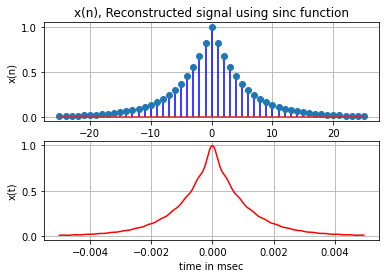

In [19]:
#ex07
# 이상적인 저역통과 필터를 사용하였지만 실질적으로 불가능
import numpy as np
import matplotlib.pyplot as plt

fs=5000; Ts=0.0002 # 샘플링 주파수와 샘플링 주기
n=np.arange(-25, 26) # 인덱스 어레이
xn=np.exp(-1000*np.abs(n*Ts)) # 샘플 신호, numpy.exp 함수는 exponential 값을 구합니다. e^(-1000*순차적 샘플링 주기)
N=len(n)

dt=0.00005 # 시간 간격
t=np.arange(-0.005, 0.005, dt) #sinc함수 시간축, 보간
Nt=len(t) # sinc함수 시간축 길이

sinc_out=np.zeros(Nt) # 복원결과 출력 배열, 0으로 초기화
for i in range(Nt):
    sum=0;
    for j in range(N): # 각각의 인덱스 어레이 마다, 싱크함수와의(보간) 곱의 합을 구한다.
        sum=sum+xn[j]*np.sinc(fs*(i*dt-j*Ts))
    sinc_out[i]=sum # 각각의 인덱스 어레이 마다 출력배열에 저장한다.

plt.subplot(2,1,1); plt.stem(n, xn, "blue"); plt.ylabel("x(n)"); plt.grid()
plt.title("x(n), Reconstructed signal using sinc function")
plt.subplot(2,1,2); plt.plot(t, sinc_out, "red")
plt.xlabel("time in msec"); plt.ylabel("x(t)"); plt.grid()

<StemContainer object of 3 artists>

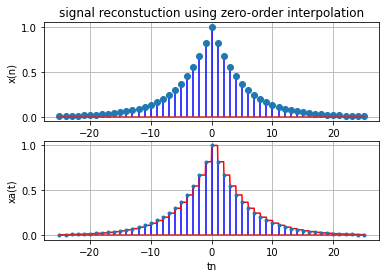

In [6]:
#ex08, 영차 유지보간법을 이용한 신호 복원 결과
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import * #보간을 위해 scipy

Ts=0.0002 # 샘플링 주기
n=np.arange(-25, 26) # 순서시퀀스 어레이
xn=np.exp(-1000*np.abs(n*Ts)) #샘플 시퀀스

ft=interp1d(n, xn, kind="previous") #영차보간 적용
tn=np.linspace(-25,25,1000) #보간할 미세구간 설정

plt.subplot(2,1,1); plt.stem(n, xn, "blue"); plt.ylabel("x(n)"); plt.grid()
plt.title("signal reconstuction using zero-order interpolation")

plt.subplot(2,1,2); plt.plot(tn, ft(tn), "red"); plt.grid()
plt.xlabel("tn"); plt.ylabel("xa(t)")
plt.stem(n, xn, "blue",".") #덧그리기

<StemContainer object of 3 artists>

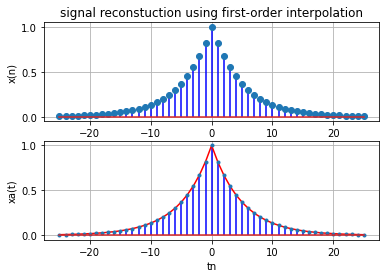

In [7]:
#ex09, 일차 유지보간법을 이용한 신호 복원 결과
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import * #보간을 위해 scipy

Ts=0.0002 # 샘플링 주기
n=np.arange(-25, 26) # 순서시퀀스 어레이
xn=np.exp(-1000*np.abs(n*Ts)) #샘플 시퀀스

ft=interp1d(n, xn, kind="linear") #일차보간 적용
tn=np.linspace(-25,25,1000) #보간할 미세구간 설정

plt.subplot(2,1,1); plt.stem(n, xn, "blue"); plt.ylabel("x(n)"); plt.grid()
plt.title("signal reconstuction using first-order interpolation")

plt.subplot(2,1,2); plt.plot(tn, ft(tn), "red"); plt.grid()
plt.xlabel("tn"); plt.ylabel("xa(t)")
plt.stem(n, xn, "blue",".") #덧그리기

<StemContainer object of 3 artists>

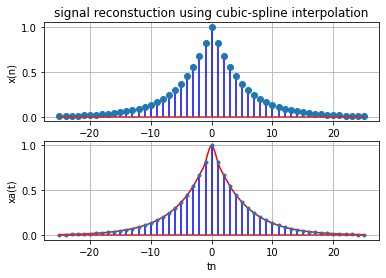

In [16]:
#ex10, 큐빅-스플라인 유지보간법을 이용한 신호 복원 결과
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import * #보간을 위해 scipy

Ts=0.0002 # 샘플링 주기
n=np.arange(-25, 26) # 순서시퀀스 어레이
xn=np.exp(-1000*np.abs(n*Ts)) #샘플 시퀀스

ft=interp1d(n, xn, kind="cubic") # 큐빅-스플라인 적용
tn=np.linspace(-25,25,1000) #보간할 미세구간 설정

plt.subplot(2,1,1); plt.stem(n, xn, "blue"); plt.ylabel("x(n)"); plt.grid()
plt.title("signal reconstuction using cubic-spline interpolation")

plt.subplot(2,1,2); plt.plot(tn, ft(tn), "red"); plt.grid()
plt.xlabel("tn"); plt.ylabel("xa(t)")
plt.stem(n, xn, "blue",".") #덧그리기